# Lab 04: Small-world networks and connectivity in random graphs

Many real-world networks exhibit both a **small diameter** as well as a **large clustering coefficient**. This combination of features is called the **small-world** property. It cannot be reproduced by a simple random graph model. In this self-study we will explore the Watts-Strogatz model, which allows to generate small-world networks. We will further explore an important property of networks which we have largely neglected so far: the presence of a giant connected component. In particular,  we will study the emergence of a giant connected component in the simple random graph models discussed in the previous two lectures.

In [29]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import *

def displayNetwork(g, visual_style={}):
    igraph.plot(g, "img/temp.png", **visual_style)
    display(Image(filename='img/temp.png'))
    
def displayPlot(plt):
    plt.savefig("img/temp_plot.png")
    display(Image(filename='img/temp_plot.png'))

### Task 1: Generating Watts-Strogatz Networks

Implement the Watts-Strogatz model as introduced in lecture 4 using `igraph` and `python`. For your implementation, you can limit yourself to the special case of $d=1$, i.e. you can start with an initial ring lattice in which nodes are connected if they are within a lattice distance of $s$.

In [35]:
def WattsStrogatz(n, s, p):    
    g = igraph.Graph.Lattice([n], nei=s)
    for edge in g.get_edgelist():
        if np.random.rand() < p:
            g.delete_edges(edge)
            g.add_edges([(edge[0], np.random.randint(n))])
            
    return(g)

Test your implementation of the model by generating three Watts-Strogatz networks for parameters $n=100$, $s=5$ and $p \in \{0, 0.1, 1\}$. Plot the resulting networks.

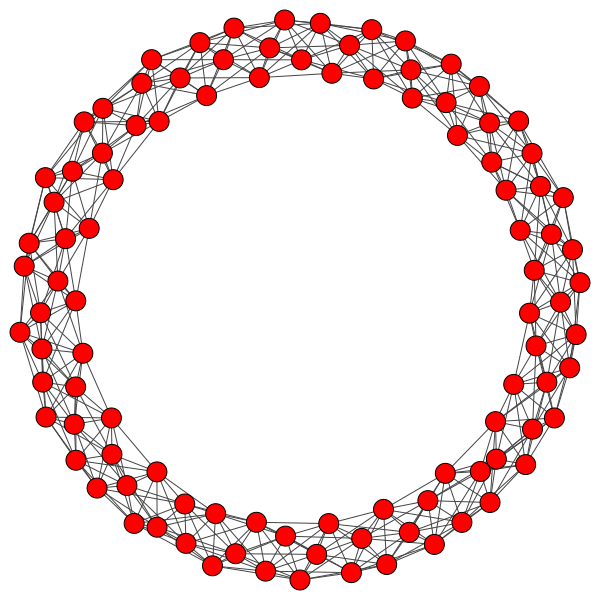

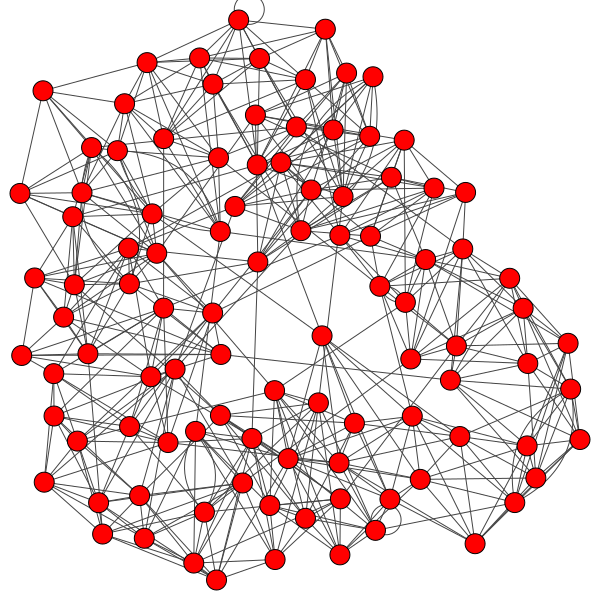

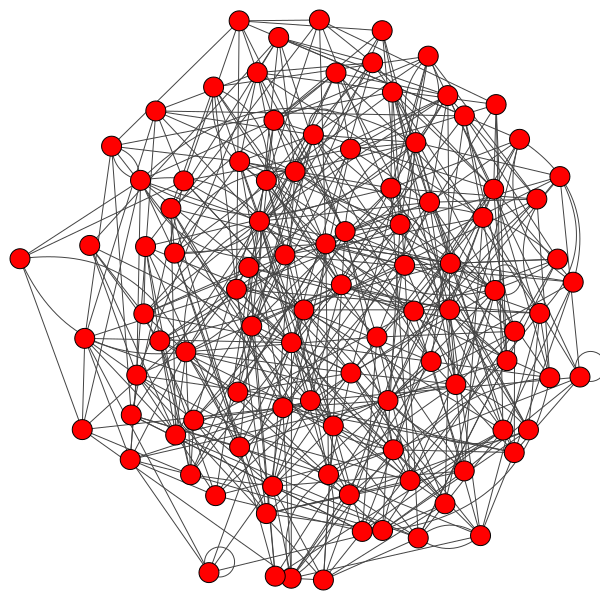

In [37]:
ws_1 = WattsStrogatz(100, 5, 0)
displayNetwork(ws_1)
    
ws_2 = WattsStrogatz(100, 5, 0.1)
displayNetwork(ws_2)

ws_3 = WattsStrogatz(100, 5, 1)
displayNetwork(ws_3)

For $n=1000$ and $p=0$, plot the clustering coefficient in the initial ring lattice for parameters $s=1, \ldots, 20$. Compare the observed clustering coefficient with your expectation based on the formula given in lecture 4, slide 30.

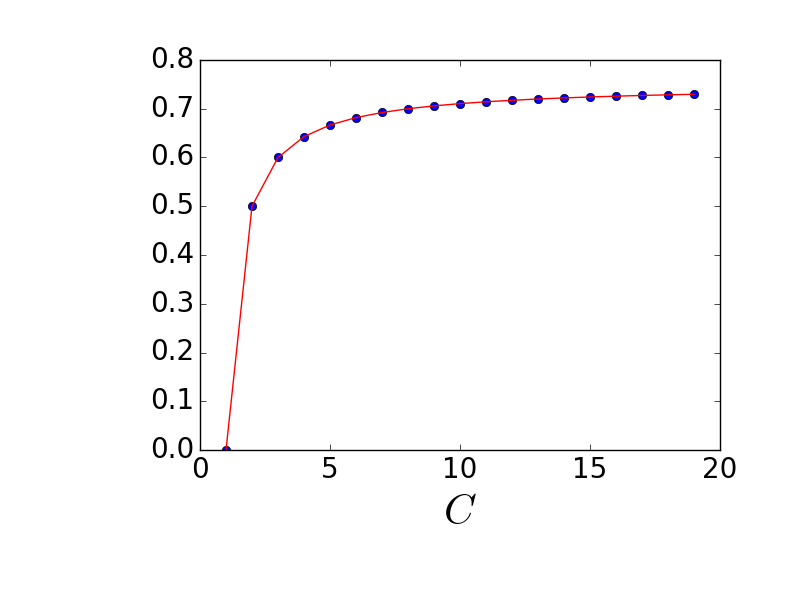

In [40]:
n = 1000
cc = []
predicted_cc = []
for s in range(1,20):
    g = WattsStrogatz(n, s, 0)
    cc.append(g.transitivity_avglocal_undirected())
    predicted_cc.append(float(3*s-3)/(4*s-2))
    
plt.clf()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)       
plt.xlabel('$s$', fontsize=30)
plt.xlabel(r'$C$', fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.25)
plt.plot(range(1,20), cc, 'bo')
plt.plot(range(1,20), predicted_cc, 'r-')
displayPlot(plt)

### Task 2: Path lengths and clustering coefficient in Watts-Strogatz networks

Use your implementation from Task 1 to study the evolution of the clustering coefficient for different rewiring probabilities $p$. For $n=1000$, $s=5$, and $20$ logarithmically spaced points $p$ in the range $\left[ 10^{-4}, 10^{0} \right]$ generate at least five microstates and compute the average clustering coefficient for each point $p$. Plot the resulting average clustering coefficients against $p$ and compare your results with those presented in lecture 4.

Working on p=0.00010
Working on p=0.00016
Working on p=0.00026
Working on p=0.00043
Working on p=0.00070
Working on p=0.00113
Working on p=0.00183
Working on p=0.00298
Working on p=0.00483
Working on p=0.00785
Working on p=0.01274
Working on p=0.02069
Working on p=0.03360
Working on p=0.05456
Working on p=0.08859
Working on p=0.14384
Working on p=0.23357
Working on p=0.37927
Working on p=0.61585
Working on p=1.00000


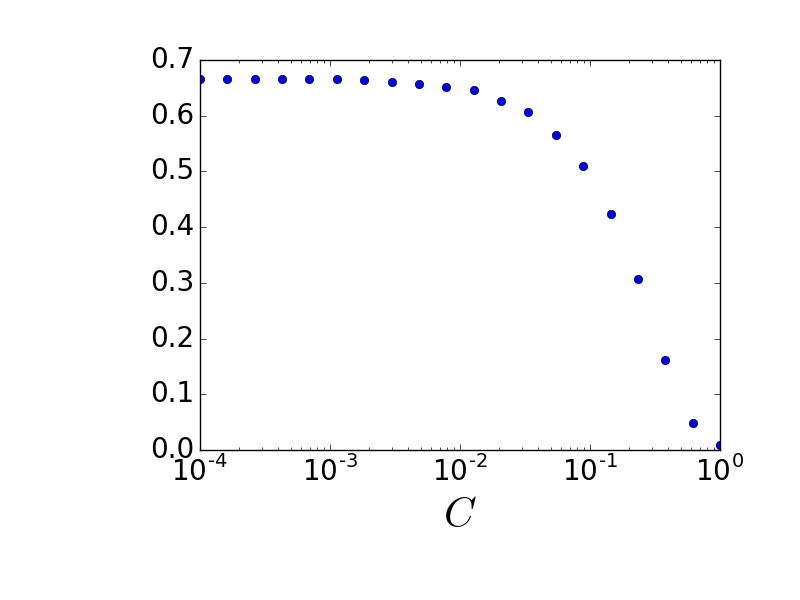

In [49]:
s = 5
n = 1000
p_range = np.logspace(-4, 0, num=20)

cc = []

for p in p_range:
    print("Working on p=%.5f" % p)
    ccs = []
    for i in range(5):
        ccs.append(WattsStrogatz(n, s, p).transitivity_avglocal_undirected())
    cc.append(np.mean(ccs))


plt.clf()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)       
plt.xlabel('$p$', fontsize=30)
plt.ylabel('$C$', fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.25)
plt.plot(p_range, cc, 'bo')
plt.xscale('log')
displayPlot(plt)

Study the evolution of the *average shortest path length* for different rewiring probabilities $p$. For $n=1000$, $s=5$, and $20$ logarithmically spaced points $p$ in the range $\left[ 10^{-4}, 10^{0} \right]$ generate at least five microstates and compute the average shortest path length for each point $p$. Plot the resulting average shortest path lengths against $p$.

Working on p=0.00010
Working on p=0.00016
Working on p=0.00026
Working on p=0.00043
Working on p=0.00070
Working on p=0.00113
Working on p=0.00183
Working on p=0.00298
Working on p=0.00483
Working on p=0.00785
Working on p=0.01274
Working on p=0.02069
Working on p=0.03360
Working on p=0.05456
Working on p=0.08859
Working on p=0.14384
Working on p=0.23357
Working on p=0.37927
Working on p=0.61585
Working on p=1.00000


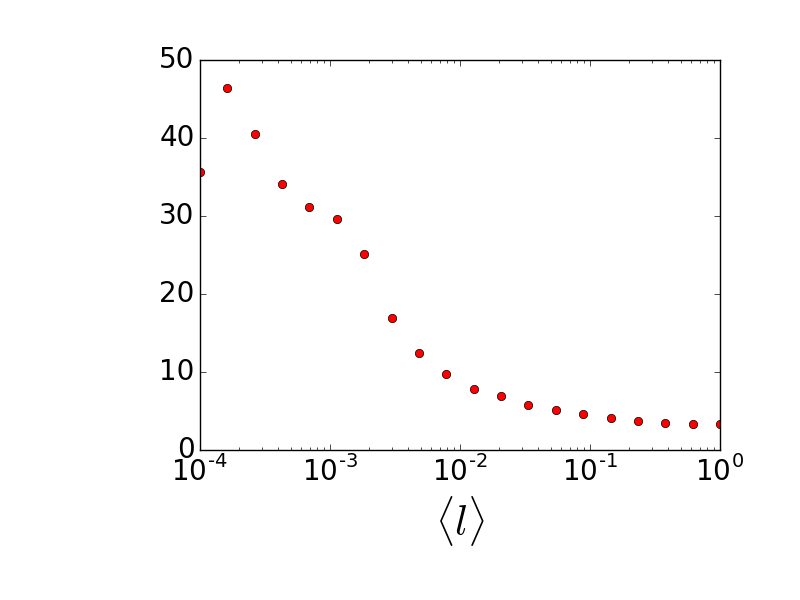

In [53]:
spl = []

for p in p_range:
    print("Working on p=%.5f" % p)
    spls = []
    for i in range(5):
        spls.append(np.mean(WattsStrogatz(n, s, p).shortest_paths_dijkstra()))
    spl.append(np.mean(spls))

plt.clf()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)       
plt.xlabel('$p$', fontsize=30)
plt.xlabel(r'$\langle l \rangle$', fontsize=30)
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(left=0.25)
plt.plot(p_range, spl, 'ro')
plt.xscale('log')
displayPlot(plt)

Compare the observed curves for the clustering coefficient and the average shortest path length. For which range of $p$ is the distance between the two curves maximal? For which range of $p$ do we obtain networks with the small-world property?

Highest distance for $p$ roughly 1e-2, small-world graphs roughly 1e-3 to 1e-1.

### Task 3: Random graphs: Emergence of a giant connected component

For $100$ uniformly spaced points $p$ in the interval $[0,0.015]$, create microstates of the $G(n,p)$ model with $n=200$ and compute the relative size $s(p)$ of its largest connected component. I.e. if - for a point $p$ - the largest connected component comprises $50$ of the $200$ nodes, for the relative size $s(p)$ we obtain $s(p)=0.25$. In order to smoothen out fluctuations, compute the mean $s(p)$ for at least $50$ random microstates generated for each value $p$.

Plot the mean value of $s(p)$ (y-axis) against $p$ (x-axis). Describe how $s(p)$ changes as $p$ increases.

Working on p=0.0000
Working on p=0.0001
Working on p=0.0003
Working on p=0.0004
Working on p=0.0006
Working on p=0.0007
Working on p=0.0009
Working on p=0.0010
Working on p=0.0012
Working on p=0.0013
Working on p=0.0015
Working on p=0.0016
Working on p=0.0018
Working on p=0.0019
Working on p=0.0021
Working on p=0.0022
Working on p=0.0024
Working on p=0.0025
Working on p=0.0027
Working on p=0.0028
Working on p=0.0030
Working on p=0.0031
Working on p=0.0033
Working on p=0.0034
Working on p=0.0036
Working on p=0.0037
Working on p=0.0039
Working on p=0.0040
Working on p=0.0042
Working on p=0.0043
Working on p=0.0045
Working on p=0.0046
Working on p=0.0048
Working on p=0.0049
Working on p=0.0051
Working on p=0.0052
Working on p=0.0054
Working on p=0.0055
Working on p=0.0057
Working on p=0.0058
Working on p=0.0060
Working on p=0.0061
Working on p=0.0063
Working on p=0.0064
Working on p=0.0066
Working on p=0.0067
Working on p=0.0069
Working on p=0.0070
Working on p=0.0072
Working on p=0.0073


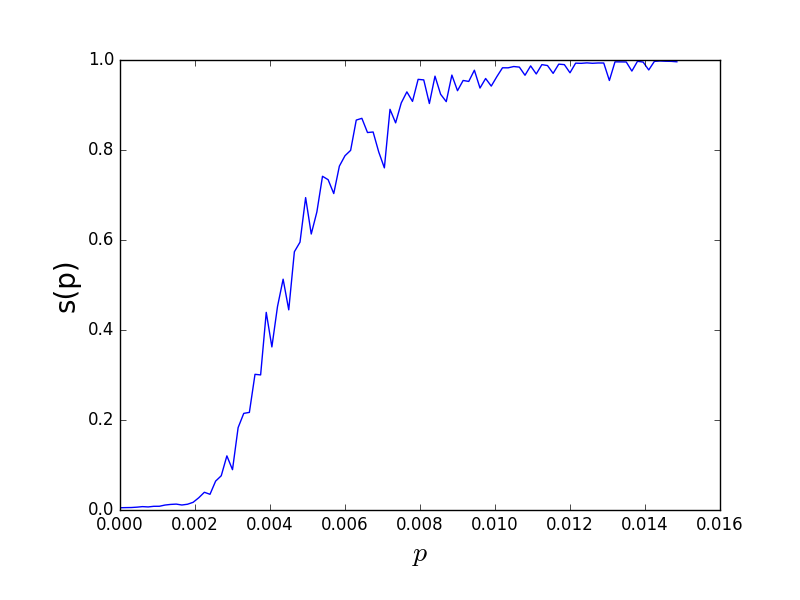

In [74]:
import itertools

def Gnp(n, p):
    g = igraph.Graph()
    g.add_vertices(n)
    
    potential_edges = list(itertools.product(range(0, n), range(0, n)))
    
    for e in potential_edges:
        will_add = np.random.random(1) < p
        
        if will_add:
            g.add_edge(e[0], e[1])
            
    return g

def plot_lcc(n, p_range, samples=1):
    probs = []
    lccs = []
    for p in p_range:
        print("Working on p=%.4f" % p)
        lcc_sizes = []
        for i in range(samples):
            lcc_sizes.append(len(Gnp(n, p).components()[0]) / float(n))
        probs.append(p)
        lccs.append(np.mean(lcc_sizes))
    
        
    plt.clf()
    plt.xlabel('$p$', fontsize=20)
    plt.ylabel('s(p)', fontsize=20) 
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.15)
    plt.plot(probs,lccs)
    displayPlot(plt)

plot_lcc(200, np.arange(0, 0.015, 0.015/100), samples=50)

Repeat this experiment for $n=2000$ and plot $s(p)$ for $100$ values of $p$ in $[0,0.003]$. How does the behavior of $s(p)$ change?

Working on p=0.0000
Working on p=0.0006
Working on p=0.0012
Working on p=0.0018
Working on p=0.0024


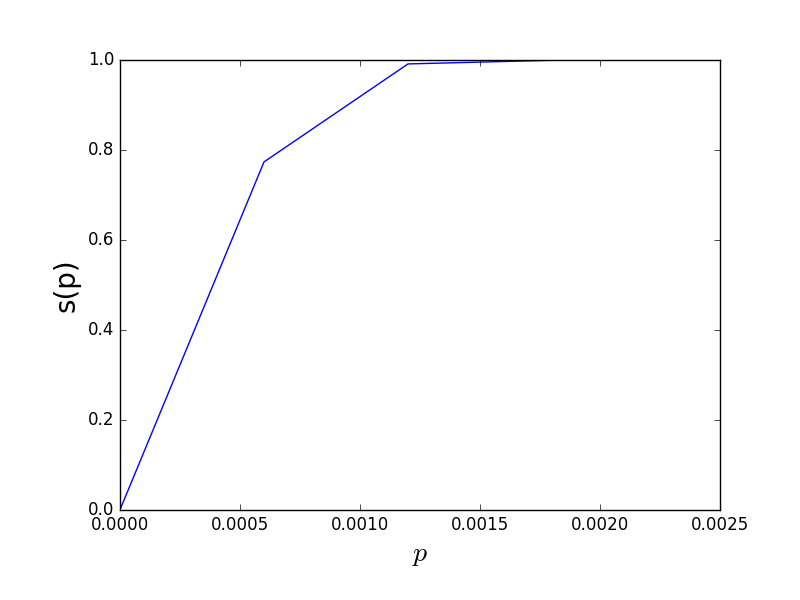

In [77]:
plot_lcc(2000, np.arange(0, 0.003, 0.003/5), samples=50)